In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib
from mpl_toolkits.mplot3d import Axes3D

import contrib.rnn.envs.occluded_envs as occluded_envs
from contrib.rnn.analysis.orbits import rollout, get_entry
from contrib.rnn.policies.osc_policies import rossler_initf, DeterministicLimitCycleRosslerPolicy
from contrib.rnn.util import get_base_env
from rllab.envs.normalized_env import normalize

In [2]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [3]:
def norm_env_scale_action(env, action):
    lb, ub = env._wrapped_env.action_space.bounds
    scaled_action = lb + (action + 1.) * 0.5 * (ub - lb)
    scaled_action = np.clip(scaled_action, lb, ub)
    return scaled_action

In [4]:
def plot_orbit(env, orbit, timestep=0.05, policy_type='flow', plot_scaled_action=True):
    N = 3 if plot_scaled_action else 2
    actions = orbit['action']        
    obs = orbit['observation']
    fig, ax = plt.subplots(1,N, sharex=True)
    t = np.arange(actions.shape[0]) * timestep
    
    for i in range(actions.shape[1]):
        if policy_type=='map':
            ax[0].step(t, actions[:,i], where='post')
        elif policy_type=='flow':
            ax[0].plot(t, actions[:,i])
    ax[0].set_title('Actions')
    
    ax_ix = 1
    if plot_scaled_action:
        scaled_actions = norm_env_scale_action(env, actions)
        for i in range(actions.shape[1]):
            if policy_type=='map':
                ax[ax_ix].step(t, scaled_actions[:,i], where='post')
            elif policy_type=='flow':
                ax[ax_ix].plot(t, scaled_actions[:,i])
        ax[ax_ix].set_title('Scaled actions')
        ax_ix += 1
            
    for i in range(obs.shape[1]):   
        ax[ax_ix].plot(t, obs[:,i])
    ax[ax_ix].set_title('Observations')
    
    return fig,ax

In [5]:
def plot_oscillator_state(states, state_dim):
    N = int(states.shape[1] / state_dim)
    subplot_kw = dict(projection='3d') if state_dim == 3 else {}
    fig, ax = plt.subplots(1,N, sharex=True, subplot_kw=subplot_kw)
    for i in range(N):
        toplot = [states[:,i*state_dim+j] for j in range(state_dim)]            
        ax[i].plot(*toplot)
        ax[i].set_title('Oscillator {0}'.format(i))
    return fig, ax

In [6]:
pathname = os.path.expandvars('/home/matthijs/git/rllab-clean/data/s3/rossler-swimmer2d-0.5/rossler-swimmer2d-0.5-4')
#pathname = os.path.expandvars('$HOME/git/rllab/data/local/cem-dtrnn-tanh/cem-dtrnn-tanh_2017_04_19_19_12_47_0001')
filename = os.path.join(pathname, 'params.pkl')
#pathname = os.path.expandvars('$HOME/git/rllab/data/local/cem-ctrnn/cem-ctrnn_2017_04_19_20_35_48_0001')
#filename = os.path.join(pathname, 'itr_99.pkl')

In [7]:
base_env_cls = occluded_envs.get_env('swimmer2d')
base_env = base_env_cls()
env = normalize(base_env, normalize_obs=True)

real_base_env = get_base_env(base_env)
env_dt = real_base_env.model.opt.timestep * real_base_env.frame_skip
    
policy = DeterministicLimitCycleRosslerPolicy(
        env_spec=env.spec,
        env_timestep=env_dt
    )

In [8]:
data = joblib.load(filename)
# stored_policy = data['policy']
# policy.set_param_values(stored_policy.get_param_values())
policy = data['policy']
env = data['env']
max_path_length = 1000
animate=True

In [9]:
base_env = get_base_env(env)
env_dt = base_env.model.opt.timestep * base_env.frame_skip

In [42]:
max_path_length=500

In [56]:
orbit = rollout(env._wrapped_env, policy, max_path_length, record=True, video=True)

Doing 2 iter for ode integrator order of 2
0.587573412885
0.587573412885
0.587573412885
0.587573412885
Doing 2 iter for ode integrator order of 2
0.590056932811
0.590056932811
0.590056932811
0.590056932811
Doing 2 iter for ode integrator order of 2
0.59216661428
0.59216661428
0.59216661428
0.59216661428
Doing 2 iter for ode integrator order of 2
0.593610549543
0.593610549543
0.593610549543
0.593610549543
Doing 2 iter for ode integrator order of 2
0.594282291726
0.594282291726
0.594282291726
0.594282291726
Doing 2 iter for ode integrator order of 2
0.59423591592
0.59423591592
0.59423591592
0.59423591592
Doing 2 iter for ode integrator order of 2
0.593609800261
0.593609800261
0.593609800261
0.593609800261
Doing 2 iter for ode integrator order of 2
0.592555607633
0.592555607633
0.592555607633
0.592555607633
Doing 2 iter for ode integrator order of 2
0.591198792569
0.591198792569
0.591198792569
0.591198792569
Doing 2 iter for ode integrator order of 2
0.589627503811
0.589627503811
0.589627

Doing 2 iter for ode integrator order of 2
0.341788812472
0.341788812472
0.341788812472
0.341788812472
Doing 2 iter for ode integrator order of 2
0.337665790359
0.337665790359
0.337665790359
0.337665790359
Doing 2 iter for ode integrator order of 2
0.336216826079
0.336216826079
0.336216826079
0.336216826079
Doing 2 iter for ode integrator order of 2
0.337155318978
0.337155318978
0.337155318978
0.337155318978
Doing 2 iter for ode integrator order of 2
0.340218126005
0.340218126005
0.340218126005
0.340218126005
Doing 2 iter for ode integrator order of 2
0.345154115144
0.345154115144
0.345154115144
0.345154115144
Doing 2 iter for ode integrator order of 2
0.351719005848
0.351719005848
0.351719005848
0.351719005848
Doing 2 iter for ode integrator order of 2
0.359682694048
0.359682694048
0.359682694048
0.359682694048
Doing 2 iter for ode integrator order of 2
0.368833742338
0.368833742338
0.368833742338
0.368833742338
Doing 2 iter for ode integrator order of 2
0.378981090281
0.378981090281


1.03559149775
Doing 2 iter for ode integrator order of 2
1.07483682464
1.07483682464
1.07483682464
1.07483682464
Doing 2 iter for ode integrator order of 2
1.11307842038
1.11307842038
1.11307842038
1.11307842038
Doing 2 iter for ode integrator order of 2
1.14957930065
1.14957930065
1.14957930065
1.14957930065
Doing 2 iter for ode integrator order of 2
1.18370399048
1.18370399048
1.18370399048
1.18370399048
Doing 2 iter for ode integrator order of 2
1.21492304452
1.21492304452
1.21492304452
1.21492304452
Doing 2 iter for ode integrator order of 2
1.24281056869
1.24281056869
1.24281056869
1.24281056869
Doing 2 iter for ode integrator order of 2
1.26703635045
1.26703635045
1.26703635045
1.26703635045
Doing 2 iter for ode integrator order of 2
1.28735447802
1.28735447802
1.28735447802
1.28735447802
Doing 2 iter for ode integrator order of 2
1.3035908509
1.3035908509
1.3035908509
1.3035908509
Doing 2 iter for ode integrator order of 2
1.31563135392
1.31563135392
1.31563135392
1.31563135392


Doing 2 iter for ode integrator order of 2
1.05356392162
1.05356392162
1.05356392162
1.05356392162
Doing 2 iter for ode integrator order of 2
1.05782434181
1.05782434181
1.05782434181
1.05782434181
Doing 2 iter for ode integrator order of 2
1.06687166865
1.06687166865
1.06687166865
1.06687166865
Doing 2 iter for ode integrator order of 2
1.07880591813
1.07880591813
1.07880591813
1.07880591813
Doing 2 iter for ode integrator order of 2
1.09169300244
1.09169300244
1.09169300244
1.09169300244
Doing 2 iter for ode integrator order of 2
1.10386931923
1.10386931923
1.10386931923
1.10386931923
Doing 2 iter for ode integrator order of 2
1.11407831287
1.11407831287
1.11407831287
1.11407831287
Doing 2 iter for ode integrator order of 2
1.1214684055
1.1214684055
1.1214684055
1.1214684055
Doing 2 iter for ode integrator order of 2
1.12552515787
1.12552515787
1.12552515787
1.12552515787
Doing 2 iter for ode integrator order of 2
1.1259926894
1.1259926894
1.1259926894
1.1259926894
Doing 2 iter for o

Doing 2 iter for ode integrator order of 2
0.880493573582
0.880493573582
0.880493573582
0.880493573582
Doing 2 iter for ode integrator order of 2
0.892844184977
0.892844184977
0.892844184977
0.892844184977
Doing 2 iter for ode integrator order of 2
0.90794499143
0.90794499143
0.90794499143
0.90794499143
Doing 2 iter for ode integrator order of 2
0.926658027161
0.926658027161
0.926658027161
0.926658027161
Doing 2 iter for ode integrator order of 2
0.949206885698
0.949206885698
0.949206885698
0.949206885698
Doing 2 iter for ode integrator order of 2
0.975143641015
0.975143641015
0.975143641015
0.975143641015
Doing 2 iter for ode integrator order of 2
1.00362505504
1.00362505504
1.00362505504
1.00362505504
Doing 2 iter for ode integrator order of 2
1.03371748073
1.03371748073
1.03371748073
1.03371748073
Doing 2 iter for ode integrator order of 2
1.06447346559
1.06447346559
1.06447346559
1.06447346559
Doing 2 iter for ode integrator order of 2
1.09497157159
1.09497157159
1.09497157159
1.09

1.108415532
1.108415532
1.108415532
1.108415532
Doing 2 iter for ode integrator order of 2
1.08671971277
1.08671971277
1.08671971277
1.08671971277
Doing 2 iter for ode integrator order of 2
1.05922005651
1.05922005651
1.05922005651
1.05922005651
Doing 2 iter for ode integrator order of 2
1.02989038258
1.02989038258
1.02989038258
1.02989038258
Doing 2 iter for ode integrator order of 2
1.00740543863
1.00740543863
1.00740543863
1.00740543863
Doing 2 iter for ode integrator order of 2
0.992976401131
0.992976401131
0.992976401131
0.992976401131
Doing 2 iter for ode integrator order of 2
0.98501128899
0.98501128899
0.98501128899
0.98501128899
Doing 2 iter for ode integrator order of 2
0.982935242429
0.982935242429
0.982935242429
0.982935242429
Doing 2 iter for ode integrator order of 2
0.986142141487
0.986142141487
0.986142141487
0.986142141487
Doing 2 iter for ode integrator order of 2
0.993267741748
0.993267741748
0.993267741748
0.993267741748
Doing 2 iter for ode integrator order of 2
1.

<IPython.core.display.Javascript object>


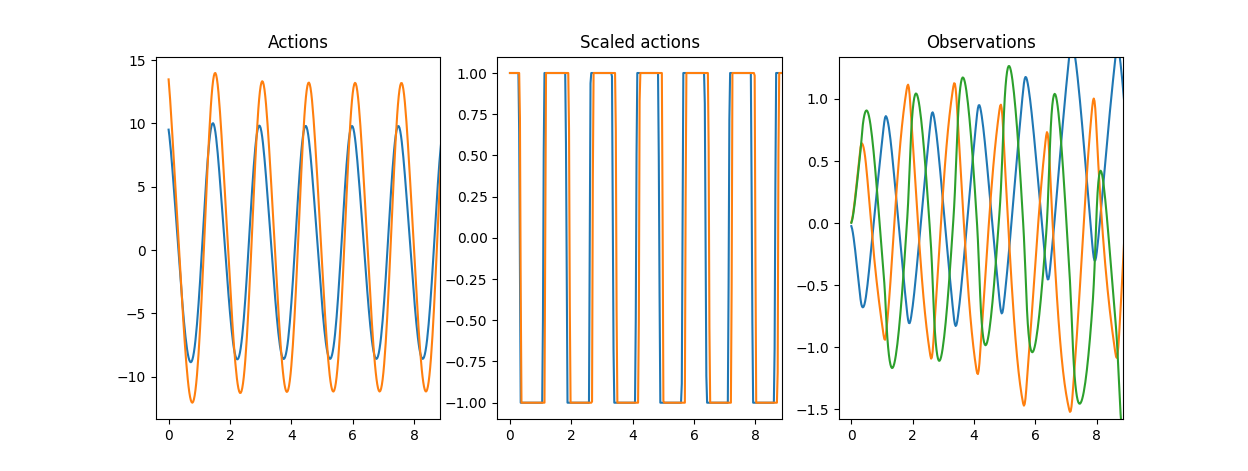

In [11]:
fig, ax = plot_orbit(env, orbit, timestep=env_dt, policy_type='flow')

<IPython.core.display.Javascript object>


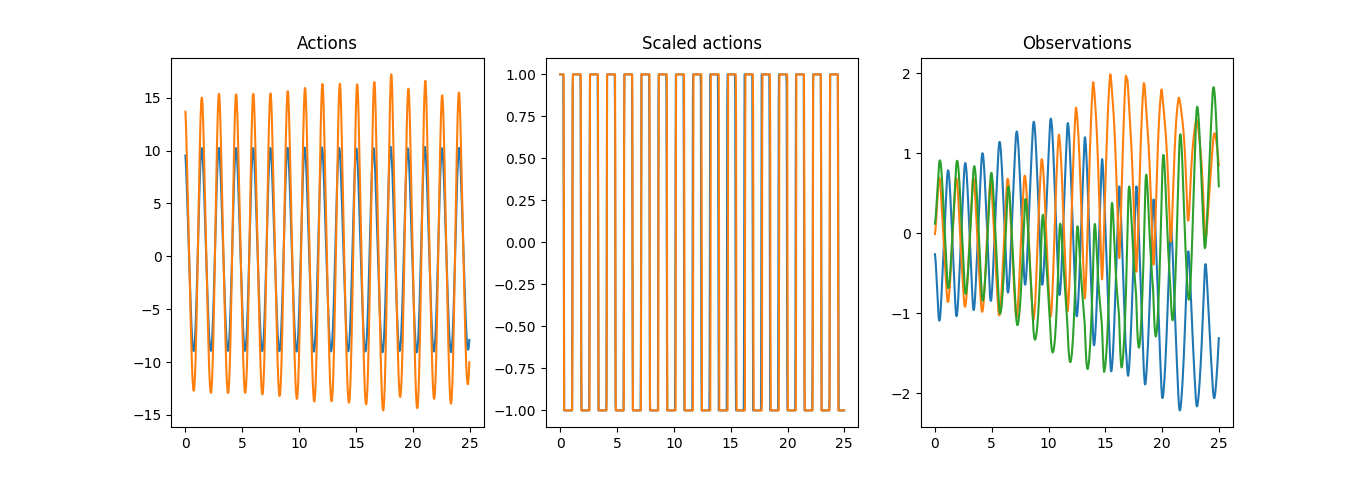

In [17]:
fig, ax = plot_orbit(env, orbit, timestep=env_dt, policy_type='flow')

<IPython.core.display.Javascript object>


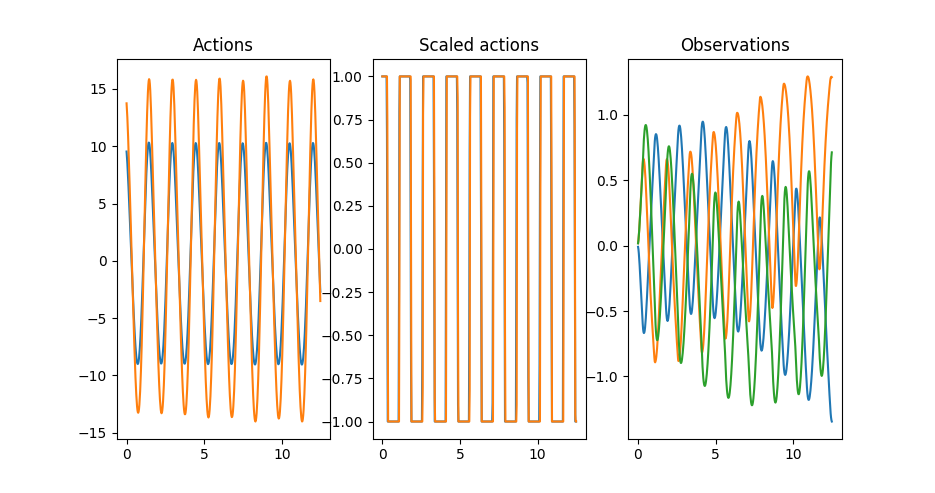

In [51]:
fig, ax = plot_orbit(env, orbit, timestep=env_dt, policy_type='flow')

<IPython.core.display.Javascript object>


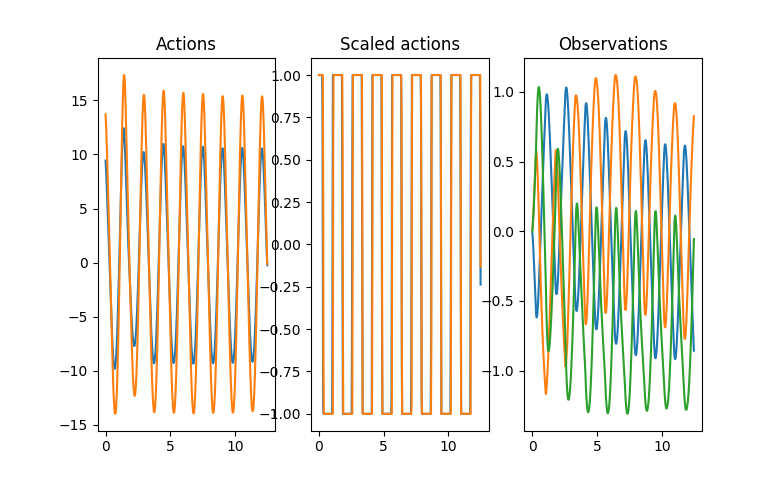

In [57]:
fig, ax = plot_orbit(env, orbit, timestep=env_dt, policy_type='flow')

In [55]:
policy.set_integrator('midpoint')

In [15]:
policy.timeconstant

0.24232040900838878

In [12]:
policy._layers[0].k = 0.0

In [52]:
policy._layers[0].W = np.array([[ 0.,  0.5,  -0.5],
                       [ 0.,  0.5,  -0.5]])

In [53]:
policy._layers[0].b[0] = policy._layers[0].phi
policy._layers[0].b[1] = -policy._layers[0].phi

In [15]:
policy._layers[0].b

array([ 0.        ,  0.29100084])

<IPython.core.display.Javascript object>


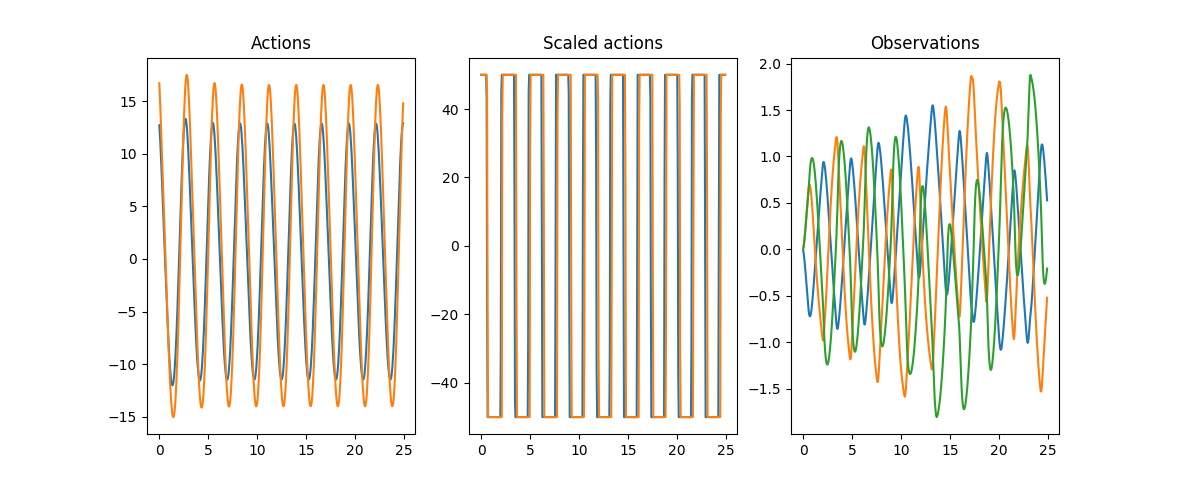

In [9]:
fig, ax = plot_orbit(env, orbit, policy_type='flow')

In [16]:
policy._layers[1].W

array([[ 2.08932738,  0.62241259],
       [ 0.44157172,  3.08006951]])

<IPython.core.display.Javascript object>


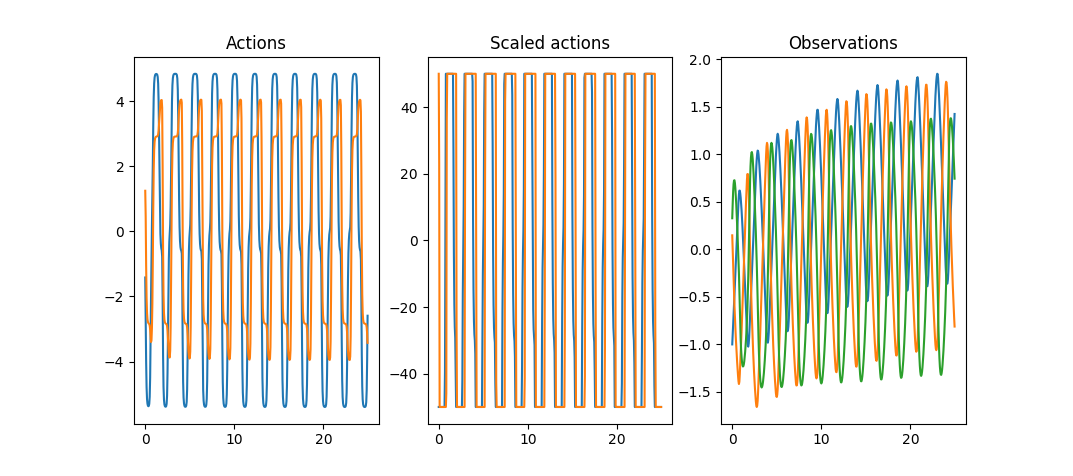

In [114]:
fig, ax = plot_orbit(env, orbit, policy_type='flow')

In [159]:
scaled_actions = norm_env_scale_action(env, orbit['action'])

In [162]:
ix = scaled_actions[100:,1] == 50.0
count = 1
counts = []
for i in range(1,ix.shape[0]):
    if ix[i] and ix[i-1]:
        count += 1
    elif ix[i-1] and not ix[i]:
        counts.append(count)
        count = 1

In [161]:
counts

[19, 19, 19, 20, 19, 19, 19, 19, 19]

In [163]:
counts

[1, 20, 20, 20, 20, 20, 21, 20, 21]

In [9]:
policy._layers[0].state_initf = rossler_initf
policy.timeconstant = policy.timeconstant * 1.5

In [149]:
policy._layers[0].phi = -0.15*np.pi

In [18]:
policy.timeconstant

0.07133641012089266

In [22]:
1/(4*np.pi)

0.07957747154594767

In [147]:
print(policy._layers[1].W)
print(policy._layers[1].b)

[[ 1.00117823 -0.00699091]
 [ 0.01356361  1.01301022]]
[-0.00102162 -0.022321  ]


In [164]:
policy._layers[1].W[0,0] = 0.8

In [169]:
orbit['reward'].sum()

35.873618035935571

In [32]:
h = np.array([get_entry(d, 'agent_state:h') for d in orbit['full_state_path']])

<IPython.core.display.Javascript object>


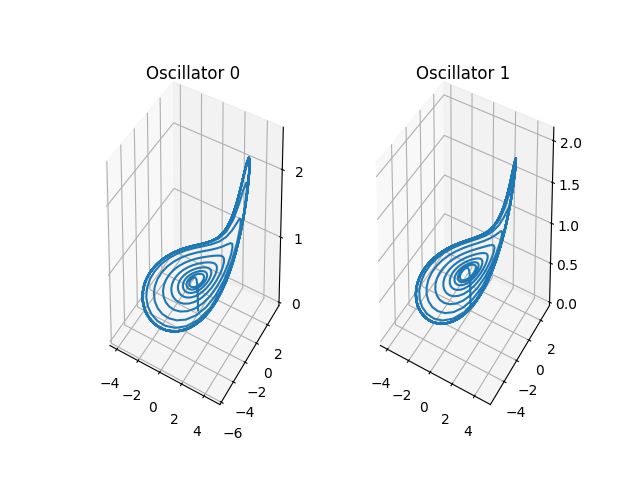

In [71]:
oscillator_dim = int(policy._layers[0].state_dim / policy._layers[0].num_out)
fig, ax = plot_oscillator_state(h, oscillator_dim)

<IPython.core.display.Javascript object>


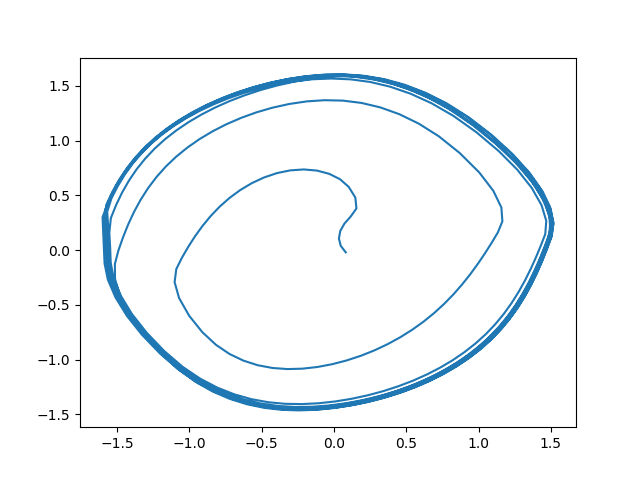

In [36]:
obs = orbit['observation']
plt.figure()
plt.plot(obs[:,1], obs[:,2])

<IPython.core.display.Javascript object>


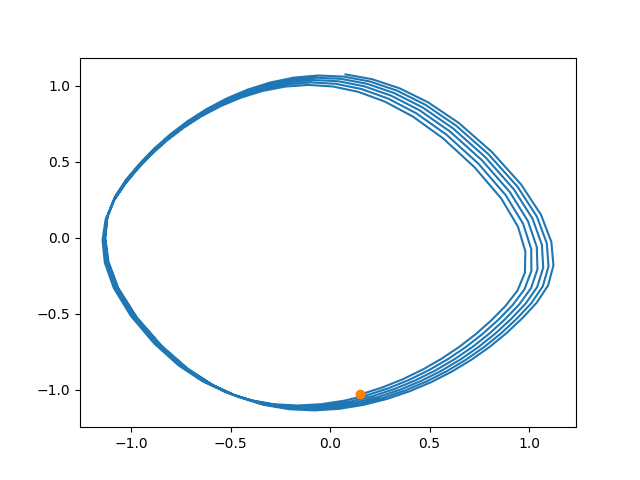

In [54]:
obs = orbit['observation']
plt.figure()
start = 250
plt.plot(obs[-start:,1], obs[-start:,2])
plt.plot(obs[-start,1], obs[-start,2], 'o')

<IPython.core.display.Javascript object>


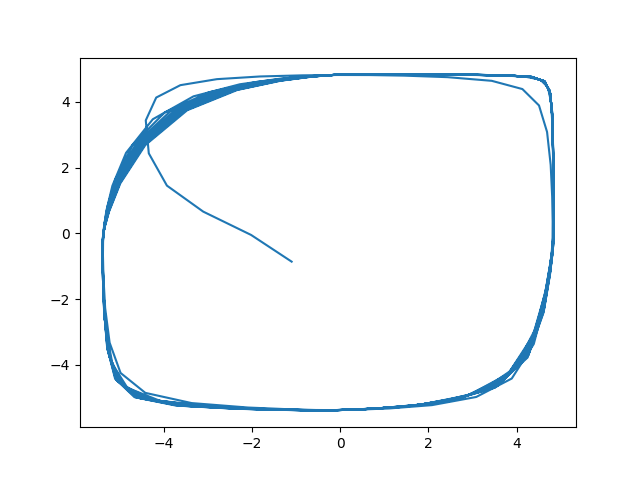

In [73]:
obs = orbit['action']
plt.figure()
start = 500
plt.plot(obs[-start:-10,0], obs[-start+10:,0])
#plt.plot(obs[-start,0], obs[-start,1], 'o')